# Inter-subject correlation

Inter-subject correlation measures to what extent the same location in two brains are synchronized with each other.
It is usually quantified using the Pearson correlation between their time series.

In [1]:
import numpy as np
import neuroboros as nb
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr, zscore
import matplotlib.pyplot as plt

In [2]:
dset = nb.Budapest()
sids = dset.subjects

In this example, we use the first two participants' data matrices. We use data from both hemispheres.

In [3]:
dm1 = dset.get_data(sids[0], 'budapest', 1, 'lr')
dm2 = dset.get_data(sids[1], 'budapest', 1, 'lr')

In [4]:
print(dm1.shape, dm2.shape)

(598, 19341) (598, 19341)


In [5]:
nt, nv = dm1.shape

For each vertex, we compute the correlation between the first participant's response time series and the second participant's.

In [6]:
isc = np.zeros((nv,))
for i in range(nv):
    isc[i] = pearsonr(dm1[:, i], dm2[:, i])[0]

The correlation can also be computed using `zscore`d data:

In [7]:
isc2 = np.mean(
    zscore(dm1, axis=0) * zscore(dm2, axis=0),
    axis=0)

In [8]:
np.testing.assert_allclose(isc, isc2)

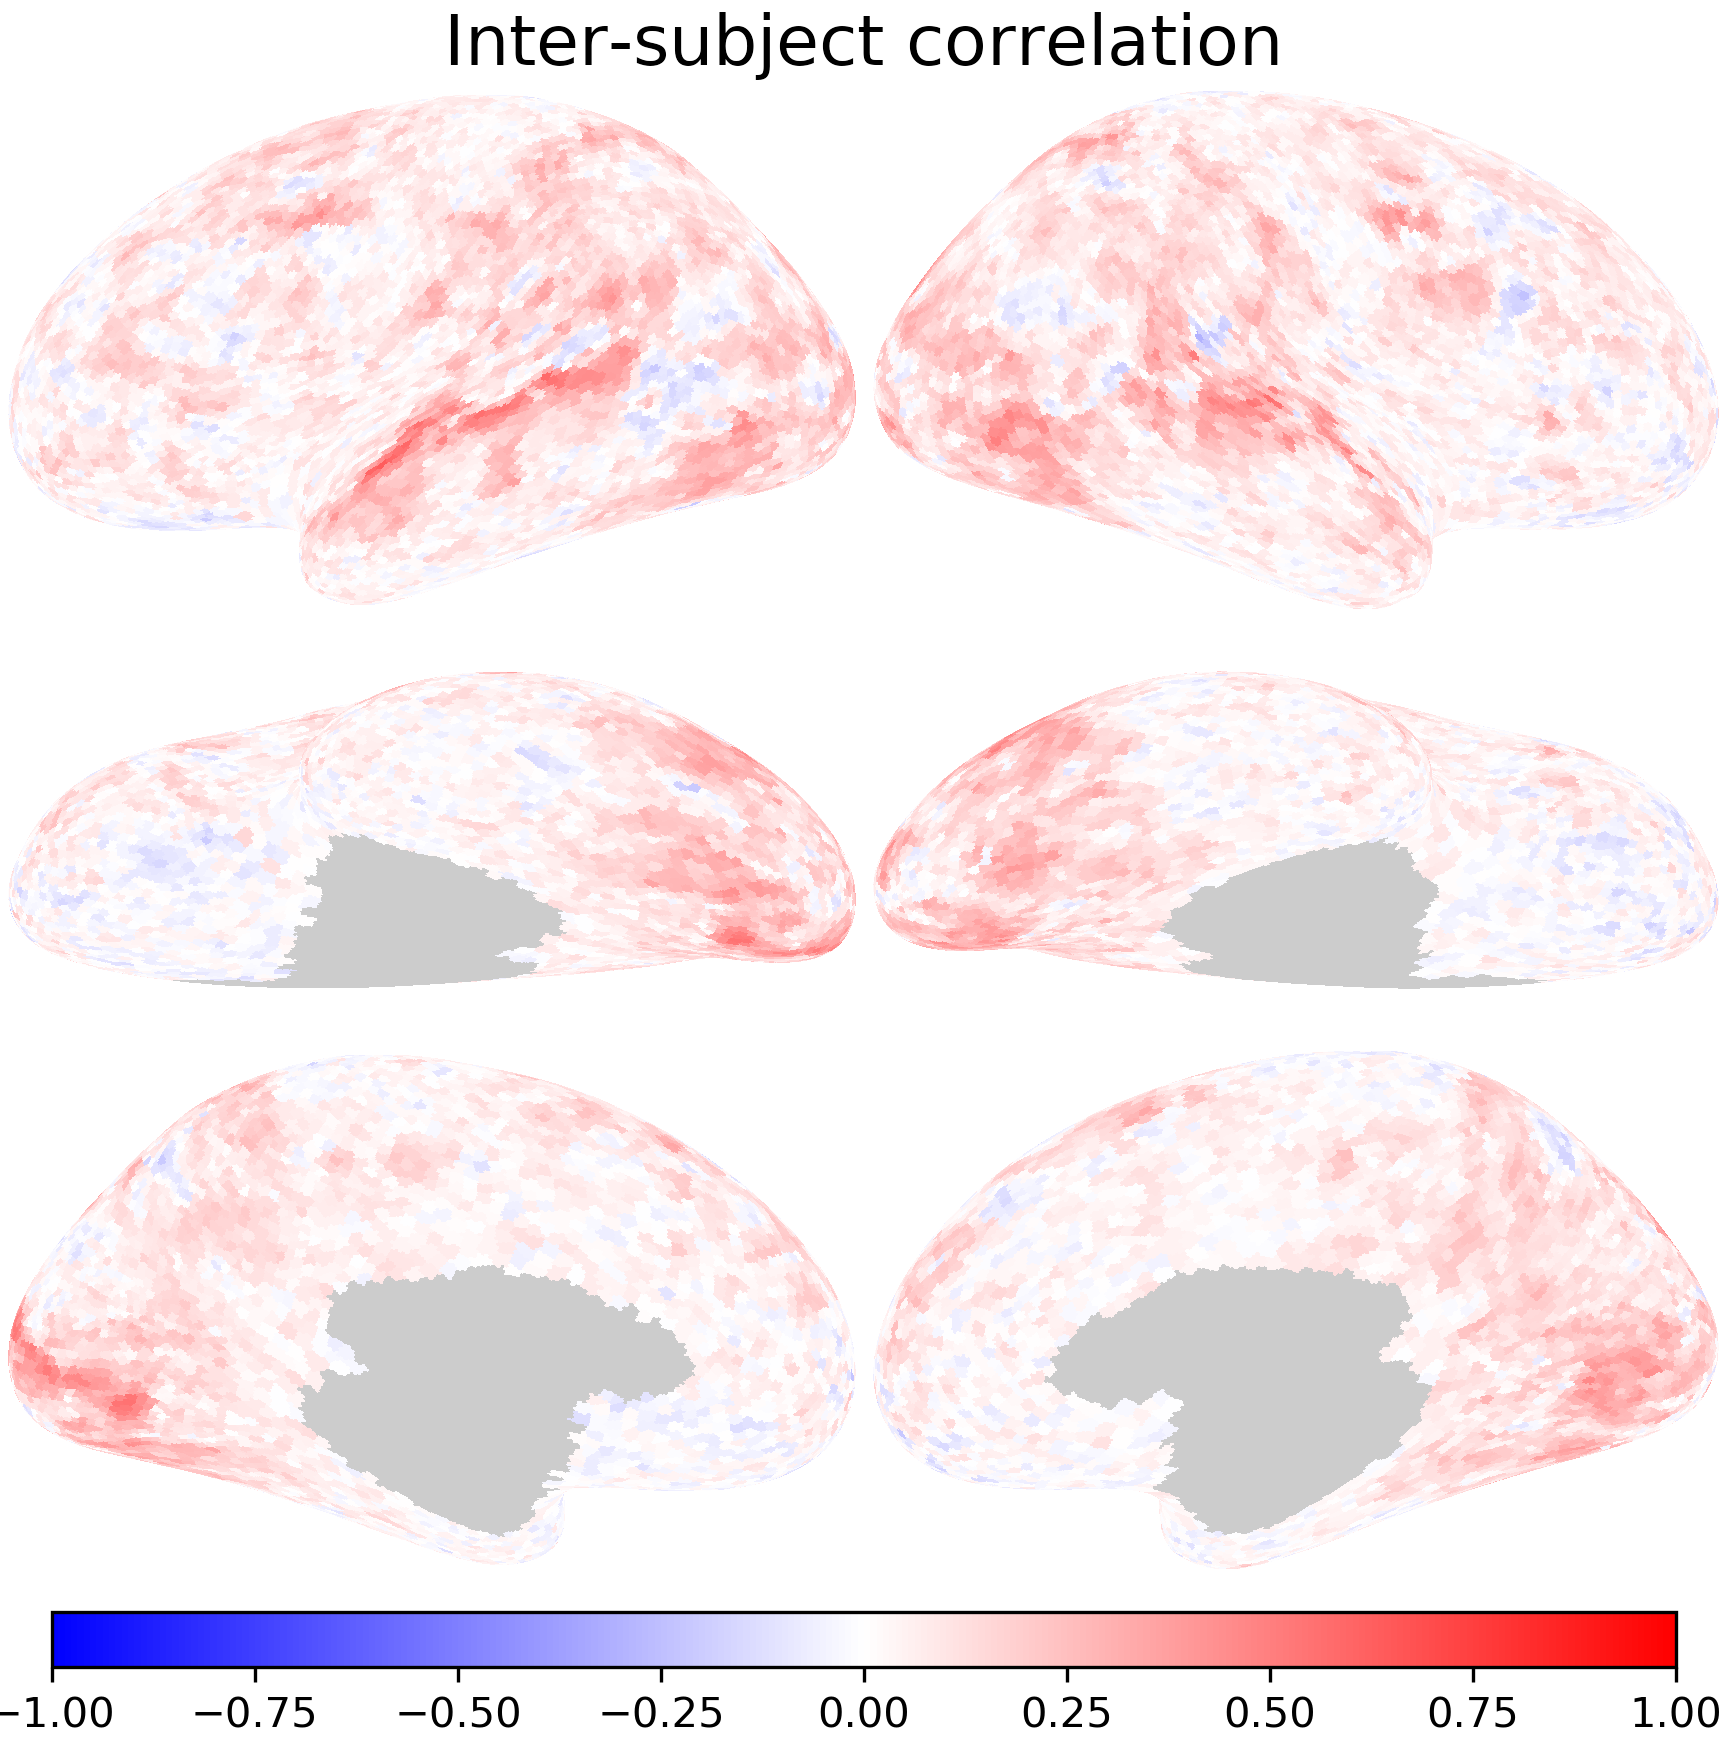

In [9]:
nb.plot(isc,
        title='Inter-subject correlation',
        vmax=1, vmin=-1, cmap='bwr',
        width=600)

## Exercise
Try to use `pdist` to compute the average ISC between all pairs of participants and plot the average ISC map using `nb.plot`.

In [10]:
dms = [dset.get_data(sid, 'budapest', 1, 'lr')
       for sid in sids]
dms = np.stack(dms, axis=0)

In [11]:
dms.shape

(21, 598, 19341)

In [12]:
isc_all = 1 - np.stack(
    [pdist(dms[:, :, i], 'correlation')
     for i in range(nv)],
    axis=1)
print(isc_all.shape)

avg = np.nanmean(isc_all, axis=0)

(210, 19341)


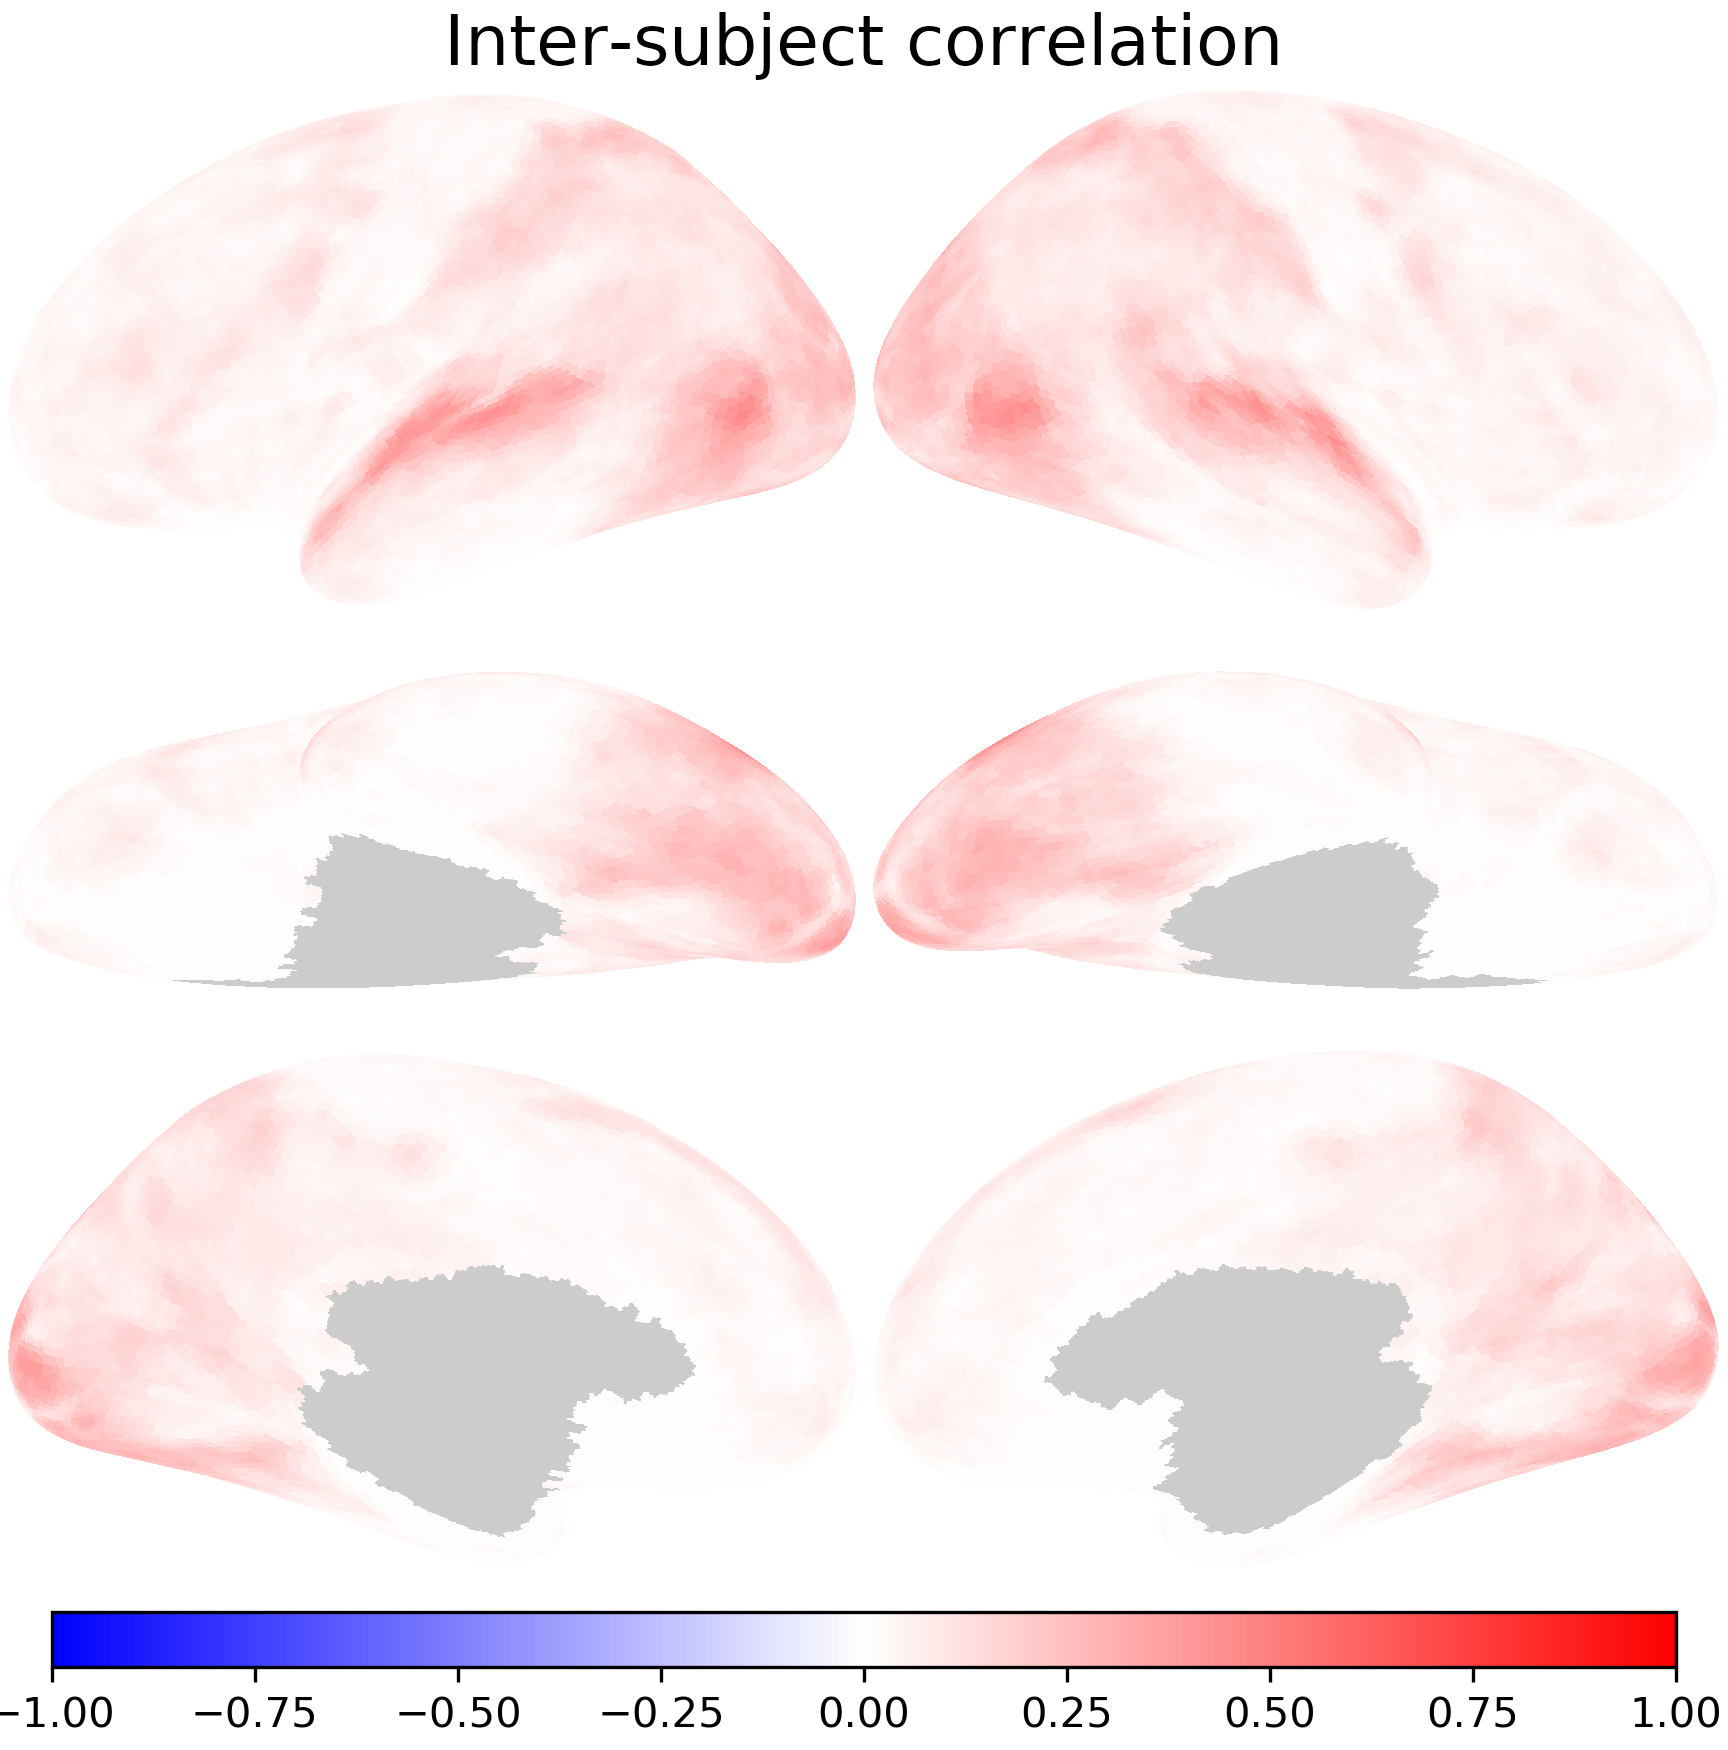

In [13]:
nb.plot(avg,
        title='Inter-subject correlation',
        vmax=1, vmin=-1, cmap='bwr',
        width=600)